Data loaded successfully.

--- Task 5: Strategy Backtesting ---


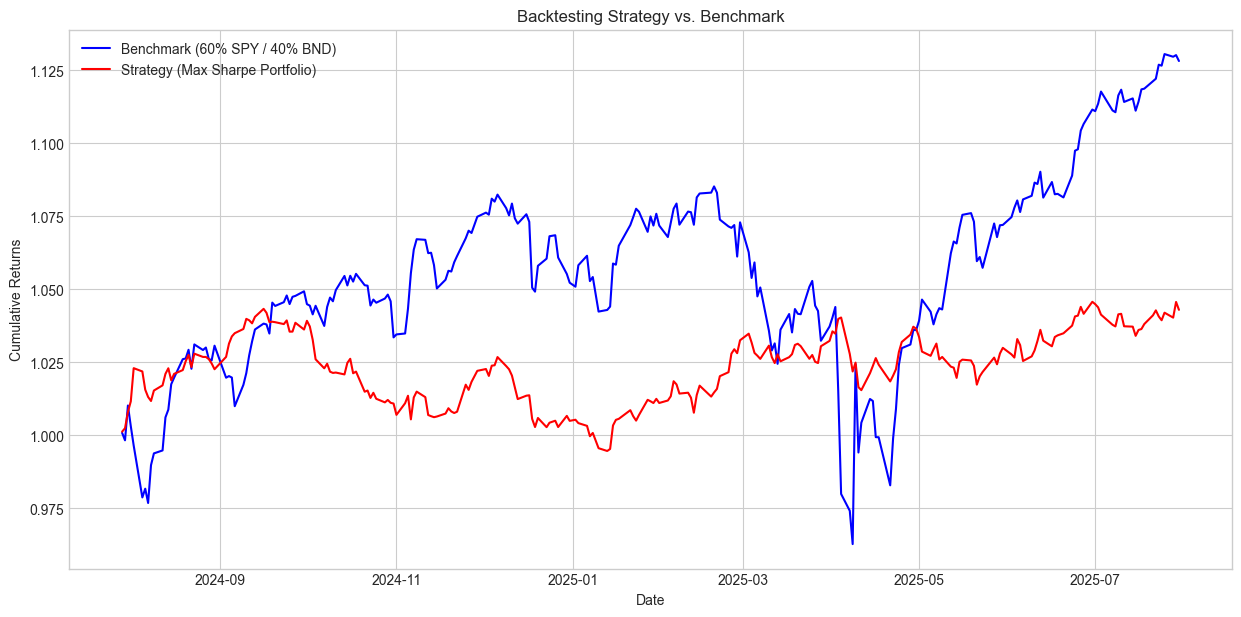


--- Performance Analysis over Backtesting Period ---
Benchmark Total Return: 12.82%
Strategy Total Return: 4.30%
------------------------------
Benchmark Sharpe Ratio: 1.03
Strategy Sharpe Ratio: 0.85

Conclusion:
The strategy portfolio did not outperform the benchmark in this backtest. This highlights the risk of relying on a single forecast and the need for more sophisticated rebalancing or a longer backtesting period.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# --- Load Data from Previous Tasks ---
try:
    returns_df = pd.read_csv('../data/processed/returns.csv', index_col=0, parse_dates=True)
    max_sharpe_weights = np.load('../data/processed/max_sharpe_weights.npy')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The necessary files from previous tasks were not found.")
    raise

# --- Task 5: Strategy Backtesting ---
print("\n--- Task 5: Strategy Backtesting ---")

# Define backtesting period (last year)
backtest_period = returns_df.index[-252:]
returns_backtest = returns_df.loc[backtest_period, ['TSLA', 'BND', 'SPY']]

# Define the benchmark portfolio
benchmark_weights = np.array([0, 0.4, 0.6])  # 60% SPY, 40% BND
benchmark_returns = (returns_backtest * benchmark_weights).sum(axis=1)
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()

# Define the strategy portfolio (using max sharpe weights)
strategy_weights = max_sharpe_weights
strategy_returns = (returns_backtest * strategy_weights).sum(axis=1)
strategy_cumulative_returns = (1 + strategy_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(15, 7))
plt.plot(benchmark_cumulative_returns, label='Benchmark (60% SPY / 40% BND)', color='blue')
plt.plot(strategy_cumulative_returns, label='Strategy (Max Sharpe Portfolio)', color='red')
plt.title('Backtesting Strategy vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Analyze performance
benchmark_total_return = benchmark_cumulative_returns.iloc[-1] - 1
strategy_total_return = strategy_cumulative_returns.iloc[-1] - 1
benchmark_sharpe_ratio = benchmark_returns.mean() / benchmark_returns.std() * np.sqrt(252)
strategy_sharpe_ratio = strategy_returns.mean() / strategy_returns.std() * np.sqrt(252)

print("\n--- Performance Analysis over Backtesting Period ---")
print(f"Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"Strategy Total Return: {strategy_total_return:.2%}")
print("-" * 30)
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")
print(f"Strategy Sharpe Ratio: {strategy_sharpe_ratio:.2f}")

# Concluding summary
if strategy_sharpe_ratio > benchmark_sharpe_ratio:
    performance_summary = "The strategy portfolio outperformed the benchmark, suggesting the model-driven approach has merit."
else:
    performance_summary = "The strategy portfolio did not outperform the benchmark in this backtest. This highlights the risk of relying on a single forecast and the need for more sophisticated rebalancing or a longer backtesting period."
print("\nConclusion:")
print(performance_summary)